In [1]:
import numpy as np
import sys

from keras.models import load_model
from progressbar import ProgressBar

module_path = '/home/diplomski-rad/consensus-net/src/python/utils/'
if module_path not in sys.path:
    print('Adding utils module.')
    sys.path.append(module_path)

import visualization

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Adding utils module.


# Validation dataset

## Load data

In [2]:
X_validate, y_validate = np.load('./dataset-n20-X-validate.npy'), np.load('./dataset-n20-y-validate.npy')

## Helper functions

In [4]:
def generate_predictions(probabilities):
    predictions = np.zeros(probabilities.shape)
    predictions[np.arange(probabilities.shape[0]), np.argmax(probabilities, axis=1)] = 1
    return predictions

## Investigate model 11

In [5]:
model = load_model('./model-11-repeat.h5')

probabilities = model.predict(X_validate)
predictions = generate_predictions(probabilities)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


### Visualize random incorrect

perm [106950]


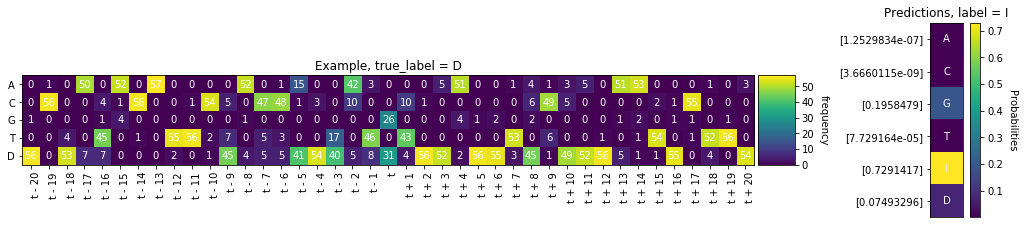

In [6]:
num_display = 1
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
permuted_incorrect_indices = np.random.permutation(incorrect_indices)[:num_display]
print('perm', permuted_incorrect_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_incorrect_indices], y_validate[permuted_incorrect_indices], probabilities[permuted_incorrect_indices], predictions[permuted_incorrect_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Visualize random correct

perm [529280]


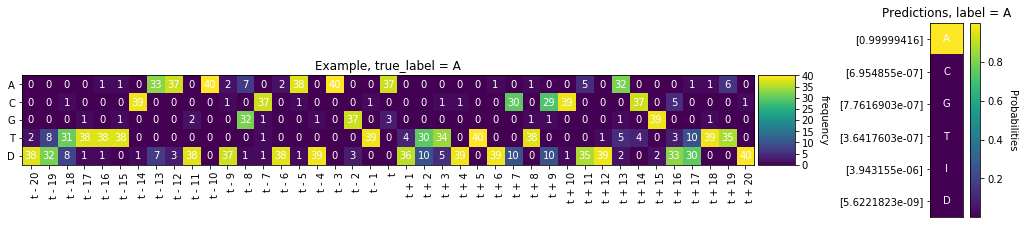

In [7]:
num_display = 1
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
permuted_correct_indices = np.random.permutation(correct_indices)[:num_display]
print('perm', permuted_correct_indices)

counter = 0
for xi, yi, prob_i, pred_i in zip(X_validate[permuted_correct_indices], y_validate[permuted_correct_indices], probabilities[permuted_correct_indices], predictions[permuted_correct_indices]):
    visualization.visualize_prediction(xi, yi, prob_i, pred_i)

### Inspect incorrect predictions

Total number of data: 3365
Number of A: 130
Number of C: 111
Number of G: 116
Number of T: 280
Number of I: 2044
Number of D: 684


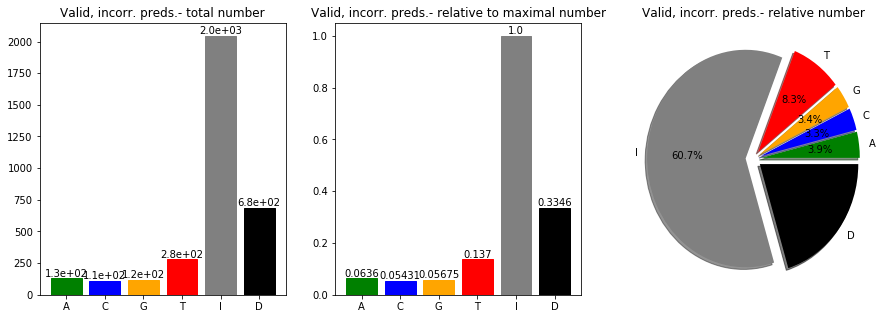

In [8]:
incorrect_indices = np.where(np.any(predictions != y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[incorrect_indices], 'Valid, incorr. preds.')

### Inspect correct predictions

Total number of data: 1264919
Number of A: 299911
Number of C: 138504
Number of G: 132832
Number of T: 305872
Number of I: 381864
Number of D: 5936


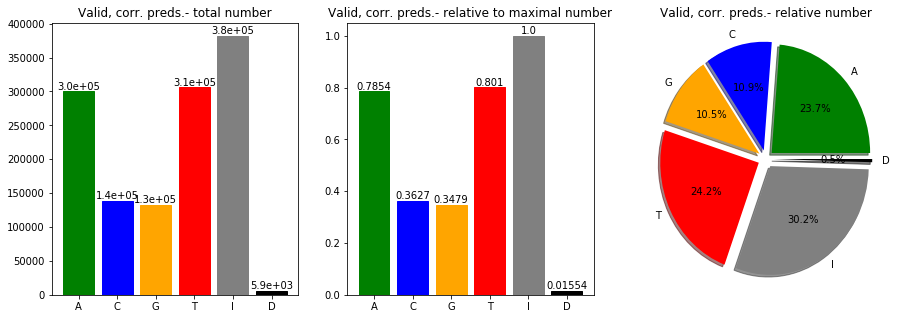

In [9]:
correct_indices = np.where(np.all(predictions == y_validate, axis=1))[0]
visualization.dataset_classes_summary(predictions[correct_indices], 'Valid, corr. preds.')

### Macro measure

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_M:', precision_score(y_validate, predictions, average='macro'))
print('Recall_M:', recall_score(y_validate, predictions, average='macro'))
print('F1_M', f1_score(y_validate, predictions, average='macro'))

Precision_M: 0.9813885652805517
Recall_M: 0.9547160188961249
F1_M 0.9666789279496779


### Micro measure

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision_u:', precision_score(y_validate, predictions, average='micro'))
print('Recall_u:', recall_score(y_validate, predictions, average='micro'))
print('F1_u', f1_score(y_validate, predictions, average='micro'))

Precision_u: 0.9973468087589215
Recall_u: 0.9973468087589215
F1_u 0.9973468087589215


### Confusion matrix

Confusion matrix, without normalization
[[299911      4     31      8     38     49]
 [    16 138504      4     29     27     35]
 [    32      5 132832      9     18     52]
 [    42     67     17 305872     61     93]
 [    53     19     13     24 381864   1935]
 [   116     42     37     63    426   5936]]


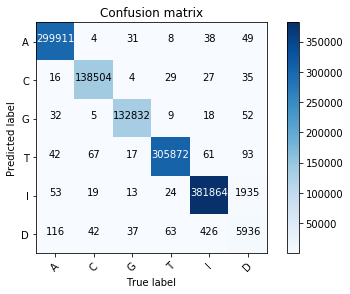

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_validate, axis=1), np.argmax(predictions,axis=1)).T
visualization.plot_confusion_matrix(cm, classes=['A', 'C', 'G', 'T', 'I', 'D'])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_validate, predictions, target_names=['A', 'C', 'G', 'T', 'I', 'D'], digits=5))

             precision    recall  f1-score   support

          A    0.99957   0.99914   0.99935    300170
          C    0.99920   0.99901   0.99911    138641
          G    0.99913   0.99923   0.99918    132934
          T    0.99909   0.99957   0.99933    306005
          I    0.99468   0.99851   0.99659    382434
          D    0.89668   0.73284   0.80652      8100

avg / total    0.99723   0.99735   0.99724   1268284

